# Implementing the Prewitt filter with python
Author: **[Carl McBride Ellis](https://u-tad.com/claustro/carl-mcbride-ellis/)**

In [1]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

In [2]:
G_x = np.array([[ 1,  1,  1],
                [ 0,  0,  0],
                [-1, -1, -1]])

In [3]:
G_x

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

In [4]:
G_y = np.array([[-1,  0,  1],
                [-1,  0,  1],
                [-1,  0,  1]])

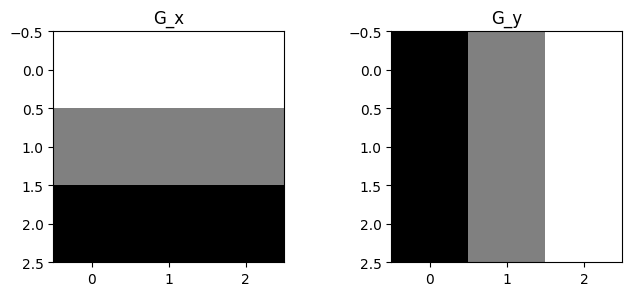

In [5]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(8, 3))
ax1.imshow(G_x, cmap='grey')
ax1.set_title("G_x")
ax2.imshow(G_y, cmap='grey')
ax2.set_title("G_y")
#plt.savefig('Prewitt_greyscale.png', bbox_inches='tight')
plt.show();

## Our `conv2d` routine

In [6]:
def conv2d(image, kernel):
    height, width = image.shape
    padding = 2
    image_padded = np.zeros(shape=(height + padding, width + padding))
    image_padded[1:-1, 1:-1] = image
    out = np.zeros(shape=image.shape)
    for row in range(height):
        for col in range(width):
            for i in range(3):
                for j in range(3):
                    out[row, col] += image_padded[row + i, col + j]*kernel[i, j]
    return out

## Load an image

In [7]:
from PIL import Image
urllib.request.urlretrieve('https://media.geeksforgeeks.org/wp-content/uploads/20210318103632/gfg-300x300.png', "logo.png")
img = Image.open('logo.png').convert('L')
image = np.array(img)

In [8]:
image.shape

(300, 300)

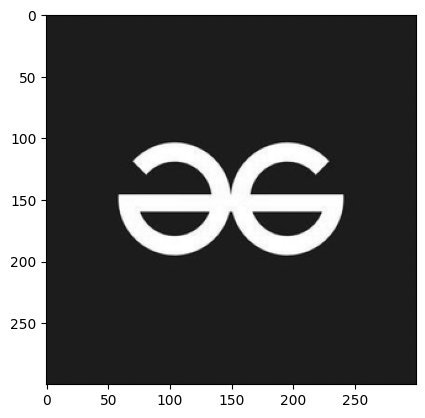

In [9]:
plt.imshow(image, cmap='grey')
plt.show()

## `G_x` detects horizontal edges

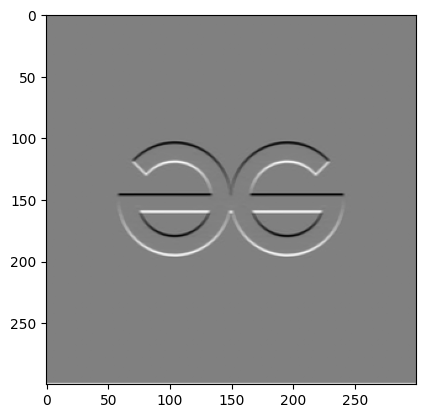

In [10]:
result_x = conv2d(image, G_x)

plt.imshow(result_x, cmap='grey')
plt.show()

## `G_y` detects vertical edges

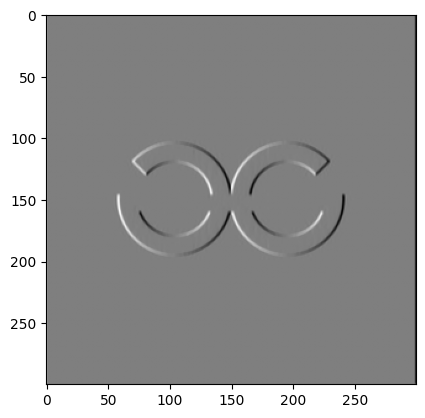

In [11]:
result_y = conv2d(image, G_y)

plt.imshow(result_y, cmap='grey')
plt.show()

### combine the two images

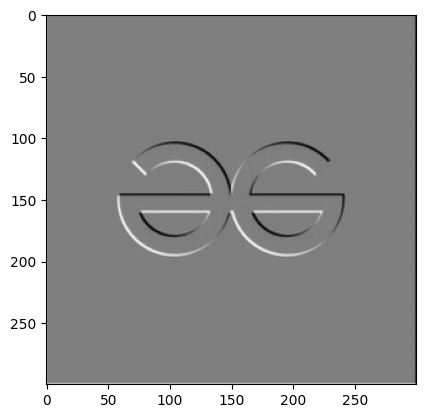

In [12]:
result = result_x + result_y

plt.imshow(result, cmap='grey')
plt.show()

## Another example

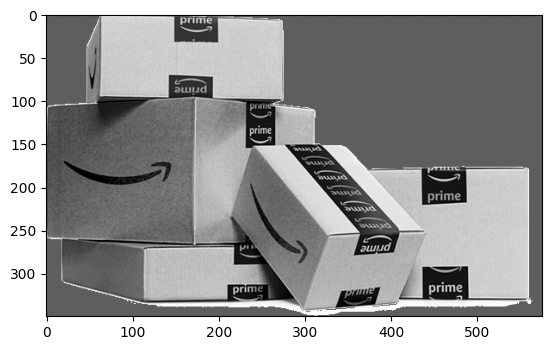

In [13]:
urllib.request.urlretrieve('https://m.media-amazon.com/images/G/01/sell/images/prime-boxes/prime-boxes-5-720._CB439798346_.png', "boxes.jpg")
img = Image.open('boxes.jpg').convert('L')
image = np.array(img)
plt.imshow(image, cmap='grey')
plt.show()

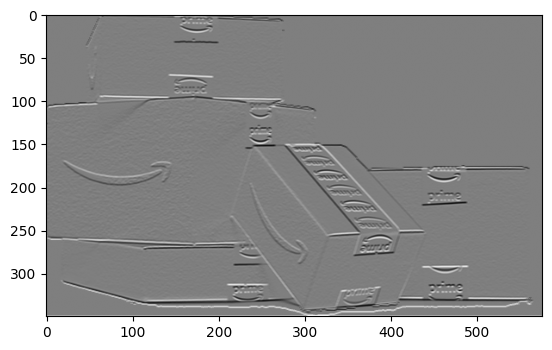

In [14]:
result_x = conv2d(image, G_x)

plt.imshow(result_x, cmap='grey')
plt.show()

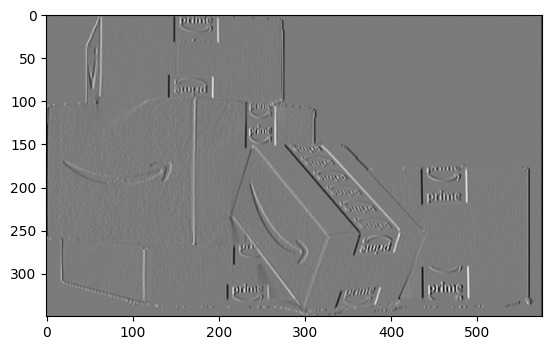

In [15]:
result_y = conv2d(image, G_y)

plt.imshow(result_y, cmap='grey')
plt.show()

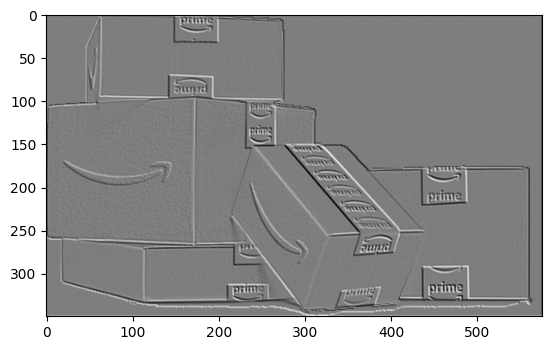

In [16]:
result = result_x + result_y

plt.imshow(result, cmap='grey')
plt.show()